vm_2024-7-11-15-25-30.csv


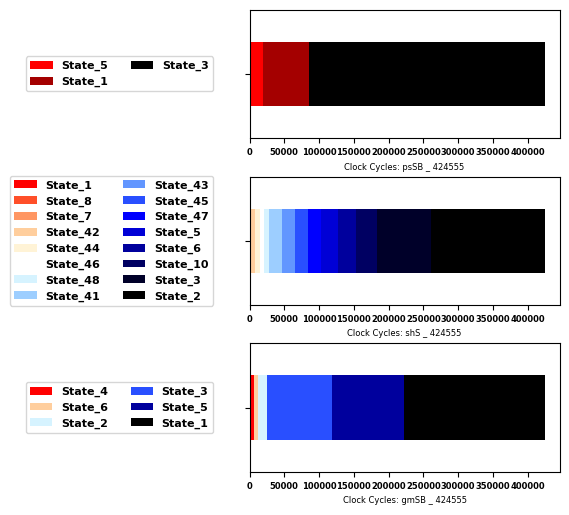

vm_2024-6-30-16-3-33.csv


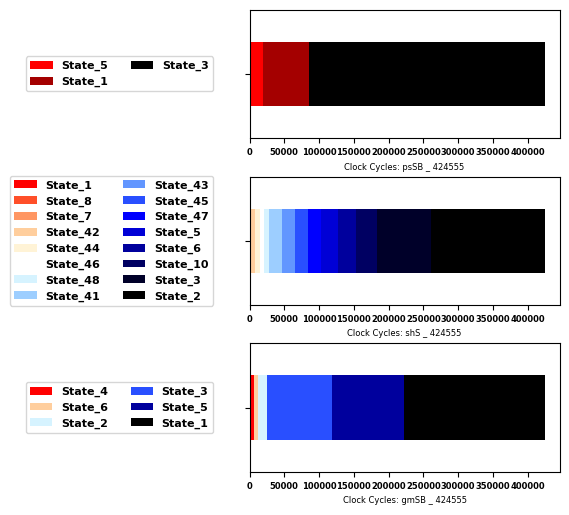

vm_2024-6-11-19-13-10.csv


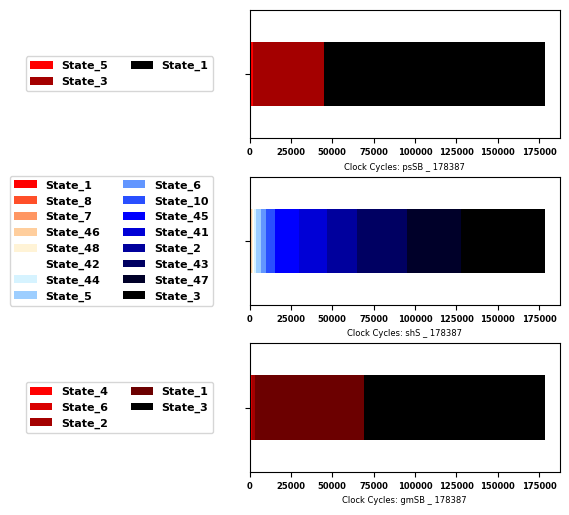

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib
import os
# folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/mm2im_profs/"
folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/vm_profs/"
cm = plt.get_cmap("flag")
NUM_COLORS = 3
font = {"family": "sans-serif", "weight": "bold", "size": 6}
matplotlib.rc("font", **font)
def plot_h(df):
    for index, row in df.iterrows():
        for col in df.columns:
            if not col.startswith("T_"):
                row = row.drop([col])

        T_rows = [row.split("_")[1] for row in df.columns if row.startswith("T_")]
        T_rows = list(set(T_rows))
        # empty df
        sdf = pd.DataFrame()
        Tlen = T_rows.__len__()
        fig, axs = plt.subplots(Tlen, 1, figsize=(4, Tlen * 2))
        for id, T_row in enumerate(T_rows):
            all_T_row_cols = [row for row in df.columns if row.startswith("T_" + T_row)]
            ndf = df[all_T_row_cols]  # only first row
            ndf = ndf[ndf.columns].sort_values(by=0, axis=1, ascending=True)
            ndf = ndf.iloc[index]
            ndf = ndf.rename(T_row)
            ndf = ndf.to_frame().T
            ax = axs[id]
            pd.DataFrame(ndf).plot(kind="barh", stacked=True, ax=ax, colormap=cm)
            ax.set_prop_cycle(
                color=[cm(1.0 * i / NUM_COLORS) for i in range(NUM_COLORS)]
            )
            legends = [
                i.replace("T_", "").replace(T_row, "State") for i in list(ndf.columns)
            ]
            # get sum of all columns
            a = ndf.sum(axis=1)
            total_cycles = a.values[0]
            ax.legend(
                legends,
                loc="center right",
                bbox_to_anchor=(-0.1, 0.5),
                prop={"size": 8},
                ncol=2,
            )
            # ax.set_title("")
            # ax.set_xlabel(f"Clock Cycles: {T_row}")
            ax.set_xlabel(f"Clock Cycles: {T_row} _ {total_cycles}")

            # change y tick labels names
            ax.set_yticklabels("")
        plt.subplots_adjust(wspace=10, hspace=Tlen / 10)
        plt.savefig("filename.png", bbox_inches="tight", dpi=300)
        plt.show()
        # plt.savefig('filename.png')
        # plt.savefig('filename.png', dpi=300)
        

        break


# sort files by date
show_all = False
show_x = 3
profs = sorted(os.listdir(folder), key=lambda x: os.path.getctime(folder + x))
profs.reverse()
for prof in profs:
    filename = folder + prof
    df = pd.read_csv(filename, sep=",", header=0)
    print(prof)
    plot_h(df)
    show_x -= 1
    if show_x == 0 and not show_all:
        break
# plt.show()
# plt.savefig('filename.png', dpi=300)